In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
#         self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
#         x = self.dropout(x)
        x = torch.sigmoid(self.fc1(x))
#         x = self.dropout(x)
        x = torch.sigmoid(self.fc2(x))
#         x = self.dropout(x)
        x = self.fc3(x)
        return x

In [3]:
class Network(nn.Module):
    """CNN."""

    def __init__(self, activation_fn, zero_padding,dropout_2d, dropout):
        """CNN Builder."""
        super(Network, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=zero_padding),
            nn.BatchNorm2d(32),
            activation_fn(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=zero_padding),
            activation_fn(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=dropout_2d),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=zero_padding),
            nn.BatchNorm2d(128),
            activation_fn(),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=zero_padding),
            activation_fn(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            activation_fn(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(4096, 1024),
            activation_fn(),
            nn.Linear(1024, 512),
            activation_fn(),
            nn.Dropout(p=dropout),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [4]:
class CNN(nn.Module):
    """CNN."""

    def __init__(self, activation_fn, zero_padding,dropout_2d, dropout):
        """CNN Builder."""
        super(CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=zero_padding),
            nn.BatchNorm2d(32),
            activation_fn(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=zero_padding),
            activation_fn(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=zero_padding),
            nn.BatchNorm2d(128),
            activation_fn(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=zero_padding),
            activation_fn(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=dropout_2d),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=zero_padding),
            nn.BatchNorm2d(256),
            activation_fn(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=zero_padding),
            activation_fn(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(4096, 1024),
            activation_fn(),
            nn.Linear(1024, 512),
            activation_fn(),
            nn.Dropout(p=dropout),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        """Perform forward."""
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [5]:
def deactivate_batchnorm(m):
    if isinstance(m, nn.BatchNorm2d):
        m.reset_parameters()
        m.eval()
        with torch.no_grad():
            m.weight.fill_(1.0)
            m.bias.zero_()

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/home/ananya/Documents/VR/backup/Part_b/data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='/home/ananya/Documents/VR/backup/Part_b/data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(len(trainset))

Files already downloaded and verified
Files already downloaded and verified
50000


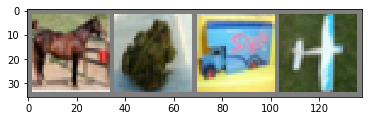

horse  frog truck plane


In [7]:
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
activation_fn = nn.Sigmoid # nn.Sigmoid or nn.Tanh or nn.ReLU
zero_padding = 1 # 0 for no padding
batch_norm = False # False for no batch_norm
dropout_2d = 0.05 
dropout = 0.1 
m = 0.9 # momentum

In [18]:
net = Net()
# if(batch_norm==False):
#     net.apply(deactivate_batchnorm)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum = m)

In [19]:

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f'%
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
        
            

print('Finished Training')

[1,  1000] loss: 2.316
[1,  2000] loss: 2.317
[1,  3000] loss: 2.317


KeyboardInterrupt: 

In [ ]:
PATH = './cifar_net.pth'
torch.save(net, PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:

net = torch.load(PATH)
net.eval()

In [ ]:
outputs = net(images)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
print(class_total)

In [ ]:
import matplotlib.pyplot as plt

time_sgd = [42.075, 98.53, 123.01, 232.7 ]
loss_sgd = [2.28, 2.048,1.966, 1.69]

time_nestorov = [19.52, 32.97, 48.10, 67.83]
loss_nestorov = [2.19, 1.90, 1.73, 1.625 ]

time_adagrad = [66.74,124.35, 197.15, 341.38 ]
loss_adagrad = [1.917,1.86, 1.832, 1.76 ]

time_rmsprop = [8.25,16.54, 22.97, 29.59]
loss_rmsprop = [1.98,1.74, 1.65, 1.61 ]

time_adam = [6.84, 18.22, 29.64 , 41.51]
loss_adam = [2.03, 1.76, 1.66,1.60 ]

plt.plot(time_sgd, loss_sgd)
plt.plot(time_nestorov, loss_nestorov)
plt.plot(time_adagrad, loss_adagrad)
plt.plot(time_rmsprop, loss_rmsprop)
plt.plot(time_adam, loss_adam)

plt.legend(["SGD", "Nestorov", "Adagrad", "RMSprop", "Adam"])


In [ ]:
dropout = [0,0.1,0.2,0.5]
accuracies = [43,45,51,47]

plt.plot(dropout, accuracies)
plt.xlabel("dropout")
plt.ylabel("accuracy")

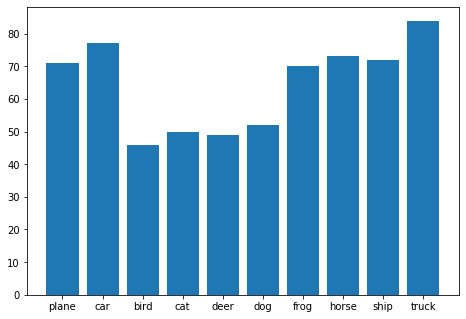

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
categories = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
without_batch_norm = [57,68,42,44,60,60,62,71,86,83]
with_batch_norm = [71,77,46,50,49,52,70,73,72,84]
ax.bar(categories,with_batch_norm)
plt.show()

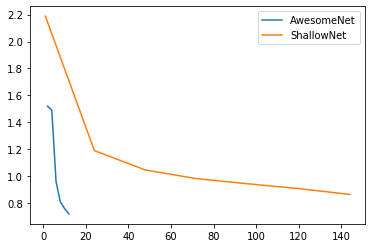

In [24]:
batch_no_deep = [2,4,6,8,10,12]
loss_deep = [1.52,1.49,0.96,0.81,0.76,0.72]
batch_no_shallow = [i*24 for i in range(1,7)]
batch_no_shallow = [1] + batch_no_shallow
loss_shallow = [2.188,1.19,1.046,0.982,0.944,0.908,0.865]

plt.plot(batch_no_deep, loss_deep)
plt.plot(batch_no_shallow, loss_shallow)

plt.legend(["AwesomeNet","ShallowNet"])